In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing
from scipy.stats import kendalltau
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.feature_selection import chi2
from sklearn.feature_selection import f_regression
from sklearn.impute import SimpleImputer
from sklearn.covariance import EllipticEnvelope
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, mean_squared_error
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [2]:
data = pd.read_csv('loan_data_set.csv')
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [4]:
data.shape

(614, 13)

In [5]:
data.drop_duplicates()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [6]:
label_encoder = preprocessing.LabelEncoder()
data['Gender'] = label_encoder.fit_transform(data['Gender'])
data['Married'] = label_encoder.fit_transform(data['Married'])
data['Education'] = label_encoder.fit_transform(data['Education'])
data['Self_Employed'] = label_encoder.fit_transform(data['Self_Employed'])
data['Property_Area'] = label_encoder.fit_transform(data['Property_Area'])
data['Loan_Status'] = label_encoder.fit_transform(data['Loan_Status'])
duplicateRows = data[data.duplicated()]
print(duplicateRows.sum())
data = data.fillna(data.median())
data.drop('Dependents', axis='columns', inplace=True)
data.drop('Loan_ID', axis='columns', inplace=True)
X = data.drop('Loan_Status', axis=1)
y = data['Loan_Status']

Loan_ID              0.0
Gender               0.0
Married              0.0
Dependents           0.0
Education            0.0
Self_Employed        0.0
ApplicantIncome      0.0
CoapplicantIncome    0.0
LoanAmount           0.0
Loan_Amount_Term     0.0
Credit_History       0.0
Property_Area        0.0
Loan_Status          0.0
dtype: float64


In [7]:
data.head()

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,5849,0.0,128.0,360.0,1.0,2,1
1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,1,1,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,1,0,0,0,6000,0.0,141.0,360.0,1.0,2,1


In [8]:
# perform feature selection using chi-square
selector = SelectKBest(score_func=f_classif, k=5)
X_selected = selector.fit_transform(X, y)

# print the indices of the selected features
print("selected feature: ")
print(selector.get_support(indices=True))


selected feature: 
[1 2 5 6 8]


In [9]:
outlier_detector = EllipticEnvelope(contamination=0.01)
# Fit the detector to the independent variables
outlier_detector.fit(X)
# Identify the outliers in the independent variables
outliers = outlier_detector.predict(X) == -1

In [10]:
# Replace the outliers with the median using SimpleImputer
imputer = SimpleImputer(strategy='median')
X[outliers] = imputer.fit_transform(X[outliers])

# Replace the original independent variables with the imputed ones
data.loc[:, data.columns != 'ApplicatIncome'] = X

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,    =42)

In [11]:
# Logistic regression model
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)
logprediction_train = logreg.predict(X_train)
logprediction_test = logreg.predict(X_test)

# The accuracy of the model
accuracy = accuracy_score(y_train, logprediction_train)
print('Accuracy of Logistic regression in train:', accuracy*100)
accuracy = accuracy_score(y_test, logprediction_test)
print('Accuracy of Logistic regression in test:', accuracy*100)

# The confusion matrix
cmatrixlog = confusion_matrix(y_train, logprediction_train)
print('Confusion Matrix Logistic regression in train:\n', cmatrixlog)
cmatrixlog = confusion_matrix(y_test, logprediction_test)
print('Confusion Matrix Logistic regression in test:\n', cmatrixlog)


# The classification report
classreport = classification_report(y_train, logprediction_train)
print('Classification Report Logistic regression in train:\n', classreport)
classreport = classification_report(y_test, logprediction_test)
print('Classification Report Logistic regression in test:\n', classreport)

# The mean squared error
mse = mean_squared_error(y_train, logprediction_train)
print('Mean Squared Error Logistic regression in train:', mse)
mse = mean_squared_error(y_test, logprediction_test)
print('Mean Squared Error Logistic regression in test:', mse)

Accuracy of Logistic regression in train: 81.4663951120163
Accuracy of Logistic regression in test: 78.86178861788618
Confusion Matrix Logistic regression in train:
 [[ 66  83]
 [  8 334]]
Confusion Matrix Logistic regression in test:
 [[18 25]
 [ 1 79]]
Classification Report Logistic regression in train:
               precision    recall  f1-score   support

           0       0.89      0.44      0.59       149
           1       0.80      0.98      0.88       342

    accuracy                           0.81       491
   macro avg       0.85      0.71      0.74       491
weighted avg       0.83      0.81      0.79       491

Classification Report Logistic regression in test:
               precision    recall  f1-score   support

           0       0.95      0.42      0.58        43
           1       0.76      0.99      0.86        80

    accuracy                           0.79       123
   macro avg       0.85      0.70      0.72       123
weighted avg       0.83      0.79      0.

In [12]:
#svm model
svm = SVC(kernel='linear')
svm.fit(X_train, y_train)

svmprediction_train = svm.predict(X_train)
svmprediction_test = svm.predict(X_test)

# the accuracy of the model
accuracy = accuracy_score(y_train, svmprediction_train)
print('Accuracy svm in train:', accuracy*100)
accuracy = accuracy_score(y_test, svmprediction_test)
print('Accuracy svm in test:', accuracy*100)

#confusion matrix
cmatrixsvm = confusion_matrix(y_train, svmprediction_train)
print('Confusion Matrix svm in train:\n', cmatrixsvm)
cmatrixsvm = confusion_matrix(y_test, svmprediction_test)
print('Confusion Matrix svm in test:\n', cmatrixsvm)

#classification report
classificationreport = classification_report(y_train, svmprediction_train)
print('Classification Report svm in train:\n', classificationreport)
classificationreport = classification_report(y_test, svmprediction_test)
print('Classification Report svm in test:\n', classificationreport)

# the mean squared error
mse = mean_squared_error(y_train, svmprediction_train)
print('Mean Squared Error svm in train:', mse)
mse = mean_squared_error(y_test, svmprediction_test)
print('Mean Squared Error svm in test:', mse)

Accuracy svm in train: 79.0224032586558
Accuracy svm in test: 78.04878048780488
Confusion Matrix svm in train:
 [[ 53  96]
 [  7 335]]
Confusion Matrix svm in test:
 [[16 27]
 [ 0 80]]
Classification Report svm in train:
               precision    recall  f1-score   support

           0       0.88      0.36      0.51       149
           1       0.78      0.98      0.87       342

    accuracy                           0.79       491
   macro avg       0.83      0.67      0.69       491
weighted avg       0.81      0.79      0.76       491

Classification Report svm in test:
               precision    recall  f1-score   support

           0       1.00      0.37      0.54        43
           1       0.75      1.00      0.86        80

    accuracy                           0.78       123
   macro avg       0.87      0.69      0.70       123
weighted avg       0.84      0.78      0.75       123

Mean Squared Error svm in train: 0.20977596741344195
Mean Squared Error svm in test: 0.2

In [13]:
# KNeighbors model
kn = KNeighborsClassifier(n_neighbors=3, algorithm='brute')
kn.fit(X_train, y_train)

knpred_train = kn.predict(X_train)
knpred_test = kn.predict(X_test)

accuracy = accuracy_score(y_train, knpred_train)
print("Accuracy KNeighbors in train:", accuracy*100)
accuracy = accuracy_score(y_test, knpred_test)
print("Accuracy KNeighbors in test:", accuracy*100)

confusion_mat = confusion_matrix(y_train, knpred_train)
print("Confusion Matrix KNeighbors in train:\n", confusion_mat)
confusion_mat = confusion_matrix(y_test, knpred_test)
print("Confusion Matrix KNeighbors in test:\n", confusion_mat)

class_report = classification_report(y_train, knpred_train)
print("Classification Report KNeighbors in train:\n", class_report)
class_report = classification_report(y_test, knpred_test)
print("Classification Report KNeighbors in test:\n", class_report)

mse = mean_squared_error(y_train, knpred_train)
print("Mean Squared Error KNeighbors in train:", mse)
mse = mean_squared_error(y_test, knpred_test)
print("Mean Squared Error KNeighbors in test:", mse)

Accuracy KNeighbors in train: 77.59674134419552
Accuracy KNeighbors in test: 61.78861788617886
Confusion Matrix KNeighbors in train:
 [[ 66  83]
 [ 27 315]]
Confusion Matrix KNeighbors in test:
 [[ 9 34]
 [13 67]]
Classification Report KNeighbors in train:
               precision    recall  f1-score   support

           0       0.71      0.44      0.55       149
           1       0.79      0.92      0.85       342

    accuracy                           0.78       491
   macro avg       0.75      0.68      0.70       491
weighted avg       0.77      0.78      0.76       491

Classification Report KNeighbors in test:
               precision    recall  f1-score   support

           0       0.41      0.21      0.28        43
           1       0.66      0.84      0.74        80

    accuracy                           0.62       123
   macro avg       0.54      0.52      0.51       123
weighted avg       0.57      0.62      0.58       123

Mean Squared Error KNeighbors in train: 0.224

C:\Users\Tarek Abo Elenen\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:211: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Tarek Abo Elenen\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:211: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be 

In [14]:
# DecisionTree model

D = DecisionTreeClassifier(max_depth=5, min_samples_split=10, min_samples_leaf=5, max_features=3)
D.fit(X_train, y_train)

Dprediction_train = D.predict(X_train)
Dprediction_test = D.predict(X_test)

#the accuracy of the model
accuracy = accuracy_score(y_train, Dprediction_train)
print('Accuracy DecisionTree in train:', accuracy*100)
accuracy = accuracy_score(y_test, Dprediction_test)
print('Accuracy DecisionTree in test:', accuracy*100)

#confusion matrix
cmatrixD = confusion_matrix(y_train, Dprediction_train)
print('Confusion Matrix DecisionTree in train:\n', cmatrixD)
cmatrixD = confusion_matrix(y_test, Dprediction_test)
print('Confusion Matrix DecisionTree in test:\n', cmatrixD)

#classification report
class_report = classification_report(y_train, Dprediction_train)
print('Classification Report DecisionTree in train:\n', class_report)
class_report = classification_report(y_test, Dprediction_test)
print('Classification Report DecisionTree in test:\n', class_report)

#mean squared error
mse = mean_squared_error(y_train, Dprediction_train)
print('Mean Squared Error decisionTree in train:', mse)
mse = mean_squared_error(y_test, Dprediction_test)
print('Mean Squared Error decisionTree in test:', mse)

Accuracy DecisionTree in train: 82.28105906313645
Accuracy DecisionTree in test: 77.23577235772358
Confusion Matrix DecisionTree in train:
 [[ 73  76]
 [ 11 331]]
Confusion Matrix DecisionTree in test:
 [[18 25]
 [ 3 77]]
Classification Report DecisionTree in train:
               precision    recall  f1-score   support

           0       0.87      0.49      0.63       149
           1       0.81      0.97      0.88       342

    accuracy                           0.82       491
   macro avg       0.84      0.73      0.76       491
weighted avg       0.83      0.82      0.81       491

Classification Report DecisionTree in test:
               precision    recall  f1-score   support

           0       0.86      0.42      0.56        43
           1       0.75      0.96      0.85        80

    accuracy                           0.77       123
   macro avg       0.81      0.69      0.70       123
weighted avg       0.79      0.77      0.75       123

Mean Squared Error decisionTree i

In [15]:
# Random Forest model
Random_Forest = RandomForestClassifier(max_depth=5, min_samples_split=10, min_samples_leaf=5, max_features=3)
Random_Forest.fit(X_train, y_train)

predictRandom_train = Random_Forest.predict(X_train)
predictRandom_test = Random_Forest.predict(X_test)

#accuracy 
accuracy = accuracy_score(y_train, predictRandom_train)
print('Accuracy Random Forest in train:', accuracy*100)
accuracy = accuracy_score(y_test, predictRandom_test)
print('Accuracy Random Forest in test:', accuracy*100)

#confusion matrix
cmatrixRandom = confusion_matrix(y_train, predictRandom_train)
print('Confusion Matrix Random Forest in train:\n', cmatrixRandom)
cmatrixRandom = confusion_matrix(y_test, predictRandom_test)
print('Confusion Matrix Random Forest in test:\n', cmatrixRandom)

# classification report
class_report_rand = classification_report(y_train, predictRandom_train)
print('Classification Report Random Forest in train:\n', class_report_rand)
class_report_rand = classification_report(y_test, predictRandom_test)
print('Classification Report Random Forest in test:\n', class_report_rand)

# mean squared error
mse = mean_squared_error(y_train, predictRandom_train)
print('Mean squared error Random Forest in train:', mse)
mse = mean_squared_error(y_test, predictRandom_test)
print('Mean squared error Random Forest in test:', mse)

Accuracy Random Forest in train: 81.67006109979633
Accuracy Random Forest in test: 78.86178861788618
Confusion Matrix Random Forest in train:
 [[ 65  84]
 [  6 336]]
Confusion Matrix Random Forest in test:
 [[18 25]
 [ 1 79]]
Classification Report Random Forest in train:
               precision    recall  f1-score   support

           0       0.92      0.44      0.59       149
           1       0.80      0.98      0.88       342

    accuracy                           0.82       491
   macro avg       0.86      0.71      0.74       491
weighted avg       0.84      0.82      0.79       491

Classification Report Random Forest in test:
               precision    recall  f1-score   support

           0       0.95      0.42      0.58        43
           1       0.76      0.99      0.86        80

    accuracy                           0.79       123
   macro avg       0.85      0.70      0.72       123
weighted avg       0.83      0.79      0.76       123

Mean squared error Random F

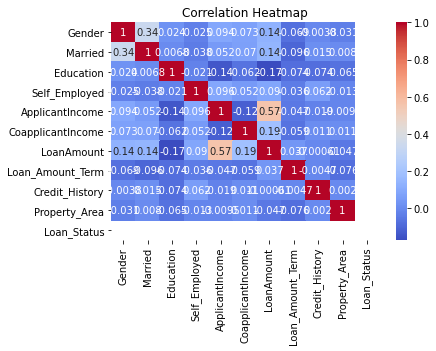

In [16]:
#Visualize correlation
corr = data.corr()
# heatmap using Seaborn
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

In [17]:

# Define models and their hyperparameters
models = [
    {
        'name': 'Logistic Regression',
        'estimator': LogisticRegression(),
        'hyperparameters': {
            'penalty': ['l1', 'l2'],
            'C': np.logspace(-4, 4, 20),
            'solver': ['liblinear']
        }
    },
    {
        'name': 'SVM',
        'estimator': SVC(),
        'hyperparameters': {
            'kernel': ['linear', 'rbf', 'sigmoid'],
            'C': np.logspace(-4, 4, 20),
            'gamma': ['scale', 'auto']
        }
    },
    {
        'name': 'Decision Tree',
        'estimator': DecisionTreeClassifier(),
        'hyperparameters': {
            'criterion': ['gini', 'entropy'],
            'max_depth': [None, 10, 20, 30],
            'min_samples_split': [2, 5, 10],
            'min_samples_leaf': [1, 2, 4],
            'max_features': ['sqrt', 'log2', None]
        }
    },
    {
        'name': 'Random Forest',
        'estimator': RandomForestClassifier(),
        'hyperparameters': {
            'n_estimators': [10, 50, 100, 200],
            'criterion': ['gini', 'entropy'],
            'max_depth': [None, 10, 20, 30],
            'min_samples_split': [2, 5, 10],
            'min_samples_leaf': [1, 2, 4],
            'max_features': ['sqrt', 'log2', None]
        }
    },
    {
        'name': 'KNN',
        'estimator': KNeighborsClassifier(),
        'hyperparameters': {
            'n_neighbors': [3, 5, 7, 9],
            'weights': ['uniform', 'distance'],
            'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
            'leaf_size': [10, 20, 30, 40, 50] 
        }
    }
]

In [ ]:
#Conduct grid search for each model
for model in models:
    print(f"Processing {model['name']}...")
    grid = GridSearchCV(model['estimator'], model['hyperparameters'], cv=5, verbose=1, n_jobs=-1)
    grid.fit(X_train, y_train)
    print(f"Best parameters: {grid.best_params_}")
    print(f"Training score: {grid.best_score_}")
    print(f"Test score: {grid.score(X_test, y_test)}")

Processing Logistic Regression...
Fitting 5 folds for each of 40 candidates, totalling 200 fits
Best parameters: {'C': 0.23357214690901212, 'penalty': 'l1', 'solver': 'liblinear'}
Training score: 0.8145949288806431
Test score: 0.7886178861788617
Processing SVM...
Fitting 5 folds for each of 120 candidates, totalling 600 fits
